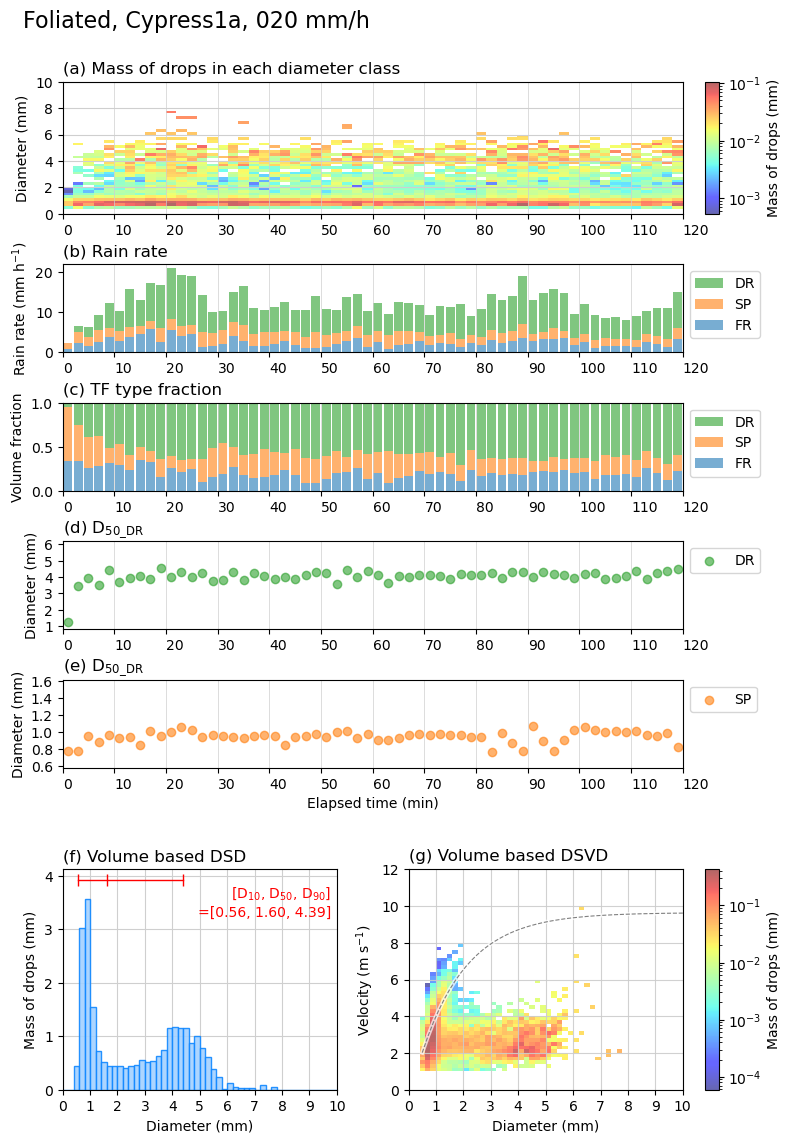

In [4]:
### visualization of throughfall drop data
import matplotlib.colors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import ticker

vtx = [2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5,30.5,31.5,32.5,33.5,34.5,35.5,36.5,37.5,38.5,39.5,40.5,41.5,42.5,43.5,44.5,45.5,46.5,47.5,48.5,49.5,50.5]
vty = [10.10,14.41,18.24,21.63,24.64,27.31,29.68,31.78,33.64,35.29,36.76,38.06,39.21,40.23,41.14,41.94,42.66,43.29,43.85,44.35,44.79,45.18,45.53,45.84,46.11,46.35,46.57,46.76,46.92,47.07,47.21,47.33,47.43,47.52,47.60,47.68,47.74,47.80,47.85,47.90,47.94,47.97,48.00,48.03,48.06,48.08,48.10,48.11,48.13]

SA = 4500

def figSave():
    fig.align_ylabels()
    Fname = f'output/TF drops fig_{filename_str}.png'
    fig.savefig(Fname, dpi=300)

def figPreparation():
    fig = plt.figure(figsize=(8, 12))
    fig.subplots_adjust(left=0.1, right=0.92, bottom=0.08, top=0.92, wspace=0.15, hspace=0.5)
    fig.suptitle(title, fontsize=16, x=0.05, ha='left')
    gs = gridspec.GridSpec(ncols=4, nrows=7, width_ratios=[20, 2, 20, 1], height_ratios=[150,100,100,100,100,1,250])

    return fig, gs

def dataPreparation():
    ## RD1
    df_rd1 = pd.read_csv(f'{parent_folder}/raindrop1/RD1_EachDrop[{filename_str}].csv', skiprows=1)
    df_rd1 = df_rd1[df_rd1['Velocity']>1]
    df_rd1 = df_rd1.reset_index(drop=True)

    # calculation of dataframe
    df_rd1['DateTime'] = pd.to_datetime(df_rd1['DateTime'])
    df_rd1['Tcls'] = (df_rd1['DateTime'].dt.strftime('%M').astype(np.int16) + df_rd1['DateTime'].dt.strftime('%H').astype(np.int16)*60)/2
    df_rd1['Tcls'] = df_rd1['Tcls'].astype(np.int16)
    df_rd1['vol'] = df_rd1['Diameter']*df_rd1['Diameter']*df_rd1['Diameter']/6.0*3.1415927/SA
    df_rd1['Dcls'] = df_rd1['Diameter'] // 0.2
    df_rd1['Vcls'] = df_rd1['Velocity'] // 0.2

    ## dataset_02min
    df = pd.read_csv(f'{parent_folder}/data_RF/dataset_02min.txt')

    condition1 = df['RI'] == int(RRsetting)
    condition2 = df['Location'] == f'{tree}{position}'
    if foliation == 'Foliated':
        condition3 = df['Foliation'] == 'F'
    else:
        condition3 = df['Foliation'] == 'U'


    df_agg = df[condition1 & condition2 & condition3]

    return df_rd1, df_agg

def setXaxis(ax):
    ticks = np.arange(0, 121, 5)
    ticklabels = ticks*2
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels, ha='left', fontsize=10)

    ax.set_xlim(0, 60)
    ax.xaxis.grid(color = '#CFCFCF', which='major', linewidth=0.5)

def figDraw_Intensity():
    ax = fig.add_subplot(gs[1, :3])

    ax.bar(temporal_x, df_agg['R_DR']*30, width=0.85, bottom=np.array(df_agg['R_SP']*30+df_agg['R_FR']*30), fc="tab:green", alpha=0.6, label="DR")
    ax.bar(temporal_x, df_agg['R_SP']*30, width=0.85, bottom=np.array(df_agg['R_FR']*30), fc="tab:orange", alpha=0.6, label="SP")
    ax.bar(temporal_x, df_agg['R_FR']*30, width=0.85, fc='tab:blue', alpha=0.6, label="FR")

    ax.set_title('(b) Rain rate', loc='left', fontsize=12)
    ax.set_ylabel('Rain rate (mm h$^{-1}$)')
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

    setXaxis(ax)

def figDraw_Fraction():
    ax = fig.add_subplot(gs[2, :3])

    x = np.linspace(0.5,59.5,len(df_agg))
    ax.bar(temporal_x, df_agg['fDR'], width=0.85, bottom=np.array(df_agg['fSP']+df_agg['fFR']), fc="tab:green", alpha=0.6, label="DR")
    ax.bar(temporal_x, df_agg['fSP'], width=0.85, bottom=np.array(df_agg['fFR']), fc="tab:orange", alpha=0.6, label="SP")
    ax.bar(temporal_x, df_agg['fFR'], width=0.85, fc='tab:blue', alpha=0.6, label="FR")

    ax.set_title('(c) TF type fraction', loc='left', fontsize=12)
    ax.set_ylabel('Volume fraction')
    ax.set_ylim([0, 1])
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

    setXaxis(ax)

def figDraw_DxDR():
    ax = fig.add_subplot(gs[3, :3])

    ax.scatter(temporal_x, df_agg['D50_DR'], c="tab:green", alpha=0.6, label="DR")

    ax.set_title('(d) D$_{\mathrm{50\_DR}}$', loc='left', fontsize=12)
    ax.set_ylabel('Diameter (mm)')
    ax.set_ylim([0.8, 6.2])
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

    setXaxis(ax)

def figDraw_DxSP():
    ax = fig.add_subplot(gs[4, :3])

    ax.scatter(temporal_x, df_agg['D50_SP'], c="tab:orange", alpha=0.6, label="SP")

    ax.set_title('(e) D$_{\mathrm{50\_DR}}$', loc='left', fontsize=12)
    ax.set_ylabel('Diameter (mm)')
    ax.set_ylim([0.58, 1.62])
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

    setXaxis(ax)
    ax.set_xlabel('Elapsed time (min)')

def figDraw_DSVD():
    ax = fig.add_subplot(gs[6, 2])

    df00 = df_rd1[['Dcls', 'Vcls', 'vol']]

    zz = []
    for i in range(50):
        for j in range(60):
            zz += [df00.query('Dcls == @i and Vcls == @j')['vol'].sum()]

    zz = np.array(zz).reshape(50,60)
    zz = np.ma.masked_where(zz==0,zz)

    xx, yy = np.mgrid[0.5:50.5, 0.5:60.5]
    H2 = ax.pcolormesh(xx, yy, zz, norm=matplotlib.colors.LogNorm(), cmap='jet', alpha=0.6)

    # Teminal velocity
    plt.plot(vtx, vty, c='white', lw=3, alpha=0.7)
    plt.plot(vtx, vty, c='gray', lw=0.8, linestyle='dashed')

    ax.set_title('(g) Volume based DSVD', loc='left', fontsize=12)
    ax.set_xlabel('Diameter (mm)')
    ax.set_ylabel('Velocity (m s$^{-1}$)')

    ax.set_xlim(0,50)
    ax.set_xticks(np.arange(0, 55, 5))
    ax.set_xticklabels(np.arange(0, 11, 1), rotation=0)

    ax.set_ylim(0,60)
    ax.set_yticks(np.arange(0, 65, 10))
    ax.set_yticklabels(np.arange(0, 13, 2), rotation=0)

    ax.xaxis.grid(color='#CCCCCC', linewidth=0.8, alpha=0.9)
    ax.yaxis.grid(color='#CCCCCC', linewidth=0.8, alpha=0.9)

    # color bar
    ax = fig.add_subplot(gs[6, 3])
    fig.colorbar(H2, cax=ax)
    ax.set_ylabel('Mass of drops (mm)')

def figDraw_temporalD():
    ax = fig.add_subplot(gs[0, :3])

    zz = []
    for i in range(61):
        for j in range(50):
            zz += [df_rd1.query('Tcls == @i and Dcls == @j')['vol'].sum()]

    zz = np.array(zz).reshape(61,50)

    xx, yy = np.mgrid[0.5:61.5, 0.5:50.5]
    H2 = ax.pcolormesh(xx, yy, zz, norm=matplotlib.colors.LogNorm(), cmap='jet', alpha=0.6)

    ax.set_title('(a) Mass of drops in each diameter class', loc='left', fontsize=12)
    ax.set_ylabel('Diameter (mm)')

    ax.set_yticks(np.linspace(0, 50, 6))
    ax.set_yticklabels(np.linspace(0, 10, 6).astype('int'))
    ax.yaxis.grid(color = '#CFCFCF')

    setXaxis(ax)

    # color bar
    ax = fig.add_subplot(gs[0, 3])
    fig.colorbar(H2, cax=ax)
    ax.set_ylabel('Mass of drops (mm)')

def figDraw_DSD():

    ax = fig.add_subplot(gs[6, 0])

    s_cut = pd.cut(df_rd1['Diameter'], np.arange(0.0, 10.2, 0.2))
    volcls = df_rd1['vol'].groupby(s_cut).sum()
    volcls.plot.bar(ax=ax, color="#a3d1ff", edgecolor="#0f87ff", width=1.0, alpha=0.9, align='edge', zorder=2)

    # calculation of D50
    aa = df_rd1['vol'].sum()
    volr = volcls/aa

    cumvol = 0.0
    D10 = D50 = D90 = 0.0
    for j in np.arange(0.2, 10.2, 0.2):
        cumvol = cumvol + volr[j]
        if(D10 == 0.0 and cumvol > 0.1):
                D10 = j-0.2 + (0.1 - (cumvol - volr[j]))/(volr[j])*0.2
        if(D50 == 0.0 and cumvol > 0.5):
                D50 = j-0.2 + (0.5 - (cumvol - volr[j]))/(volr[j])*0.2
        if(D90 == 0.0 and cumvol > 0.9):
                D90 = j-0.2 + (0.9 - (cumvol - volr[j]))/(volr[j])*0.2
                break

    x = [D10*5, D50*5, D90*5]
    y = [volcls.max()*1.1, volcls.max()*1.1, volcls.max()*1.1]
    plt.plot(x, y, c='red', lw=1, marker="|", markersize=8, markeredgewidth=1)
    txt = '=[%.2f, %.2f, %.2f]' % (D10, D50, D90)
    plt.text(49, volcls.max()*1.03, '[D$_{10}$, D$_{50}$, D$_{90}$]', color='r', ha='right', va='center')
    plt.text(49, volcls.max()*0.93, txt, color='r', ha='right', va='center')

    ax.set_axisbelow(True)
    ax.set_title('(f) Volume based DSD', loc='left', fontsize=12)
    ax.set_xlabel('Diameter (mm)')
    ax.set_ylabel('Mass of drops (mm)')

    ax.set_xlim(0, 50)
    ax.set_xticks(np.arange(0, 55, 5))
    ax.set_xticklabels(np.arange(0, 11, 1), rotation=0)

    ax.xaxis.grid(color = '#CFCFCF')
    ax.yaxis.grid(color = '#CFCFCF')


# =================================================================
parent_folder = f'C:/Users/knanko/Downloads/NIED16 repository/dataset'

foliation = 'Foliated'    # 'Foliaterd', 'Unfoliated'
tree = 'Cypress'    # 'Cedar', 'Cypress', 'Zelkova', 'Birch'
position = '1a'    # '1a','1b','1c','2a','2b'
RRsetting = '020'    # '015','020','030','040','050','100'
filename_str = f'{foliation}_{tree}{position}_{RRsetting}'

title = f'{foliation}, {tree}{position}, {RRsetting} mm/h'
df_rd1, df_agg = dataPreparation()
fig, gs = figPreparation()

temporal_x = np.arange(0.5,len(df_agg)+0.5)
figDraw_temporalD()
figDraw_Intensity()
figDraw_Fraction()
figDraw_DxDR()
figDraw_DxSP()
figDraw_DSD()
figDraw_DSVD()

# figSave()


In [ ]:
print(len(df_agg))